In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from functions import (get_comments_df,freq_table,clean_column,puncless_column,
                       remove_single_letter_column,cvec_df,remove_duplicates,
                       ski_and_sb_stopword_list,p_stem_column,sentiment_analyzer,
                       pipeline_sentiment)

## 10000 comments

Orignial code to pull 10000 comments.  Turned it into a dataframe and saved it so that I wouldn't be working with a new set of comments everytime I reset my kernel.\
**sb_v_ski = get_comments_df(10000,'snowboarding','skiing')**\
**sb_v_ski.to_csv('./data/all_comment_data_10000.csv')**

In [2]:
# importing and reading dataframe with comments (1 = snowboarding, 0 = skiing)
sb_v_ski_10000 = pd.read_csv('./data/all_comment_data_10000.csv',index_col = 0)
sb_v_ski_10000.head()

,comments,ski or sb
0,I think most people just prefer spinning to th...,1
1,They've all blown out their ACL and MCL multip...,1
2,L1 has some really good gloves,1
3,I have a leather pigskin kinco mitten for the ...,1
4,Alaska is next on the agenda!,1


## Comment Cleaning

In [3]:
# remove punctuation from comments
puncless_column(sb_v_ski_10000,'comments')

,comments,ski or sb,no punctuation comments
0,I think most people just prefer spinning to th...,1,i think most people just prefer spinning to th...
1,They've all blown out their ACL and MCL multip...,1,they ve all blown out their acl and mcl multip...
2,L1 has some really good gloves,1,l1 has some really good gloves
3,I have a leather pigskin kinco mitten for the ...,1,i have a leather pigskin kinco mitten for the ...
4,Alaska is next on the agenda!,1,alaska is next on the agenda
...,...,...,...
19995,They are both test and tried beacons and you h...,0,they are both test and tried beacons and you h...
19996,He is good at backflips.,0,he is good at backflips
19997,Well I'll be.,0,well i ll be
19998,Damn . Good reminder to me to break out the sk...,0,damn good reminder to me to break out the skin...


In [4]:
# remove stopwords and words that contain anything uniquely related to skiing
# or snowboarding
clean_column(sb_v_ski_10000,'no punctuation comments')

,comments,ski or sb,no punctuation comments,stopwordless comments
0,I think most people just prefer spinning to th...,1,i think most people just prefer spinning to th...,think people prefer spinning left including go...
1,They've all blown out their ACL and MCL multip...,1,they ve all blown out their acl and mcl multip...,blown acl mcl multiple times mother fuckers wa...
2,L1 has some really good gloves,1,l1 has some really good gloves,l1 really good gloves
3,I have a leather pigskin kinco mitten for the ...,1,i have a leather pigskin kinco mitten for the ...,leather pigskin kinco mitten cold softshell gl...
4,Alaska is next on the agenda!,1,alaska is next on the agenda,alaska agenda
...,...,...,...,...
19995,They are both test and tried beacons and you h...,0,they are both test and tried beacons and you h...,test tried beacons honestly wrong pieps
19996,He is good at backflips.,0,he is good at backflips,good backflips
19997,Well I'll be.,0,well i ll be,
19998,Damn . Good reminder to me to break out the sk...,0,damn good reminder to me to break out the skin...,damn good reminder break skins lifts need stin...


In [5]:
# remove rows that contain comments with words that are a single letter
# or empty string
remove_single_letter_column(sb_v_ski_10000,'stopwordless comments')

,comments,ski or sb,no punctuation comments,stopwordless comments
0,I think most people just prefer spinning to th...,1,i think most people just prefer spinning to th...,think people prefer spinning left including go...
1,They've all blown out their ACL and MCL multip...,1,they ve all blown out their acl and mcl multip...,blown acl mcl multiple times mother fuckers wa...
2,L1 has some really good gloves,1,l1 has some really good gloves,l1 really good gloves
3,I have a leather pigskin kinco mitten for the ...,1,i have a leather pigskin kinco mitten for the ...,leather pigskin kinco mitten cold softshell gl...
4,Alaska is next on the agenda!,1,alaska is next on the agenda,alaska agenda
...,...,...,...,...
18994,Never said he wasn’t,0,never said he wasn t,said
18995,They are both test and tried beacons and you h...,0,they are both test and tried beacons and you h...,test tried beacons honestly wrong pieps
18996,He is good at backflips.,0,he is good at backflips,good backflips
18997,Damn . Good reminder to me to break out the sk...,0,damn good reminder to me to break out the skin...,damn good reminder break skins lifts need stin...


In [6]:
# remove duplicate comments
remove_duplicates(sb_v_ski_10000,'stopwordless comments')

In [7]:
# apply PorterStemmer to each comment
p_stem_column(sb_v_ski_10000,'stopwordless comments')

,comments,ski or sb,no punctuation comments,stopwordless comments,stemmed comments
0,I think most people just prefer spinning to th...,1,i think most people just prefer spinning to th...,think people prefer spinning left including go...,think peopl prefer spin left includ goofi ride...
1,They've all blown out their ACL and MCL multip...,1,they ve all blown out their acl and mcl multip...,blown acl mcl multiple times mother fuckers wa...,blown acl mcl multipl time mother fucker way loos
2,L1 has some really good gloves,1,l1 has some really good gloves,l1 really good gloves,l1 realli good glove
3,I have a leather pigskin kinco mitten for the ...,1,i have a leather pigskin kinco mitten for the ...,leather pigskin kinco mitten cold softshell gl...,leather pigskin kinco mitten cold softshel glo...
4,Alaska is next on the agenda!,1,alaska is next on the agenda,alaska agenda,alaska agenda
...,...,...,...,...,...
18987,Never said he wasn’t,0,never said he wasn t,said,said
18988,They are both test and tried beacons and you h...,0,they are both test and tried beacons and you h...,test tried beacons honestly wrong pieps,test tri beacon honestli wrong piep
18989,He is good at backflips.,0,he is good at backflips,good backflips,good backflip
18990,Damn . Good reminder to me to break out the sk...,0,damn good reminder to me to break out the skin...,damn good reminder break skins lifts need stin...,damn good remind break skin lift need stink li...


## Converting Dataframes into csv Files

In [8]:
# create a dataframe with all ski comments
ski_10000 = pd.DataFrame(sb_v_ski_10000[sb_v_ski_10000['ski or sb'] == 0]).reset_index(drop = True)
ski_10000

,comments,ski or sb,no punctuation comments,stopwordless comments,stemmed comments
0,A buddy of mine who could only afford 1 skis a...,0,a buddy of mine who could only afford 1 skis a...,buddy afford time went ones hesitation good di...,buddi afford time went one hesit good direct
1,"Don’t get me wrong, the bent chetlers are not ...",0,don t get me wrong the bent chetlers are not a...,wrong bent chetlers bad old automatics bent ch...,wrong bent chetler bad old automat bent chetle...
2,Great photo. Seriously. \n\n\nBut is this the ...,0,great photo seriously but is this the equivale...,great photo seriously equivalent chic taking p...,great photo serious equival chic take photo salad
3,What kind of budget are you looking at? It’s p...,0,what kind of budget are you looking at it s pr...,kind budget looking probably great time buy se...,kind budget look probabl great time buy season...
4,Coverage is fine on-trail.,0,coverage is fine on trail,coverage fine trail,coverag fine trail
...,...,...,...,...,...
9195,Never said he wasn’t,0,never said he wasn t,said,said
9196,They are both test and tried beacons and you h...,0,they are both test and tried beacons and you h...,test tried beacons honestly wrong pieps,test tri beacon honestli wrong piep
9197,He is good at backflips.,0,he is good at backflips,good backflips,good backflip
9198,Damn . Good reminder to me to break out the sk...,0,damn good reminder to me to break out the skin...,damn good reminder break skins lifts need stin...,damn good remind break skin lift need stink li...


In [9]:
# create a dataframe with all snowboarding comments
sb_10000 = pd.DataFrame(sb_v_ski_10000[sb_v_ski_10000['ski or sb'] == 1]).reset_index(drop = True)
sb_10000

,comments,ski or sb,no punctuation comments,stopwordless comments,stemmed comments
0,I think most people just prefer spinning to th...,1,i think most people just prefer spinning to th...,think people prefer spinning left including go...,think peopl prefer spin left includ goofi ride...
1,They've all blown out their ACL and MCL multip...,1,they ve all blown out their acl and mcl multip...,blown acl mcl multiple times mother fuckers wa...,blown acl mcl multipl time mother fucker way loos
2,L1 has some really good gloves,1,l1 has some really good gloves,l1 really good gloves,l1 realli good glove
3,I have a leather pigskin kinco mitten for the ...,1,i have a leather pigskin kinco mitten for the ...,leather pigskin kinco mitten cold softshell gl...,leather pigskin kinco mitten cold softshel glo...
4,Alaska is next on the agenda!,1,alaska is next on the agenda,alaska agenda,alaska agenda
...,...,...,...,...,...
9787,Decided to get the Jones Mountain Twin now nee...,1,decided to get the jones mountain twin now nee...,decided jones mountain twin need help sizing f...,decid jone mountain twin need help size ft 190...
9788,Try do in the rotation in two motions like bac...,1,try do in the rotation in two motions like bac...,try rotation motions like pause throw tail grab,tri rotat motion like paus throw tail grab
9789,As a guy that tried learning in my mid twentie...,1,as a guy that tried learning in my mid twentie...,guy tried learning mid twenties wish chance le...,guy tri learn mid twenti wish chanc learn youn...
9790,Cat traxxx,1,cat traxxx,cat traxxx,cat traxxx


## Sentiment Analysis

In [10]:
# create a column that applies SentimentIntensityAnalyzer to each ski 
# comment SentimentIntensityAnalyzer has been modified so that primarily 
# neutral comments aren't classified as positive or negative
ski_10000 = sentiment_analyzer(ski_10000,'stemmed comments')

In [11]:
# create a column that applies SentimentIntensityAnalyzer to each snowboarding
# comment
sb_10000 = sentiment_analyzer(sb_10000,'stemmed comments')

In [12]:
# create a column that applies SentimentIntensityAnalyzer to each comment 
sb_v_ski_10000 = sentiment_analyzer(sb_v_ski_10000,'stemmed comments')

In [13]:
# save complete dataframe dataframe as csv
sb_v_ski_10000.to_csv('./data/sb_v_ski_comment_data_10000.csv')

In [14]:
# save complete snowboarding dataframe as csv
sb_10000.to_csv('./data/sb_comment_data_10000.csv')

In [15]:
# save complete ski dataframe as csv
ski_10000.to_csv('./data/ski_comment_data_10000.csv')

## Visualizations
Got different color names for matplotlib from:\
https://matplotlib.org/3.1.0/gallery/color/named_colors.html

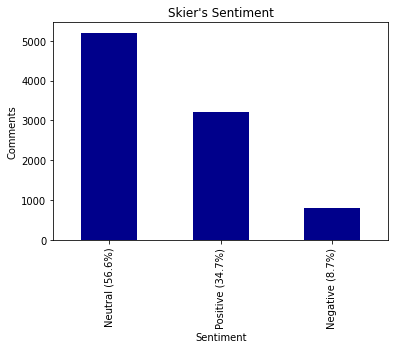

In [16]:
# plot skier's sentiment
ski_10000['sentiment'].value_counts().plot(
    kind = 'bar',
    color = 'darkblue')

positions = (0,1,2)
labels = ('Neutral (56.6%)','Positive (34.7%)','Negative (8.7%)')
plt.xticks(positions,labels)
plt.xlabel('Sentiment')
plt.ylabel('Comments')
plt.title('Skier\'s Sentiment');

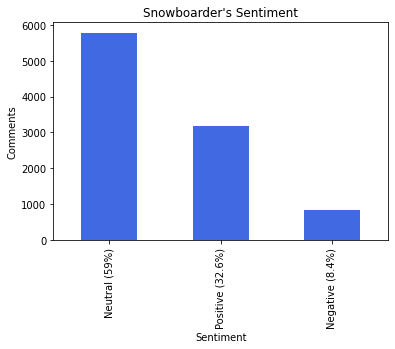

In [17]:
# plot snowboarder's sentiment
sb_10000['sentiment'].value_counts().plot(
    kind = 'bar',
    color = 'royalblue')

positions = (0,1,2)
labels = ('Neutral (59%)','Positive (32.6%)','Negative (8.4%)')
plt.xticks(positions,labels)
plt.xlabel('Sentiment')
plt.ylabel('Comments')
plt.title('Snowboarder\'s Sentiment');

## Top Words

In [18]:
# look at top words
freq_table(sb_v_ski_10000,'stemmed comments')

Most Common 		  Least Common
['boot', 4759, 0.0148]    ['statu', 1, 0.0]
['like', 4437, 0.0138]    ['traxxx', 1, 0.0]
['day', 2919, 0.0091]     ['fraction', 1, 0.0]
['look', 2712, 0.0085]    ['twenti', 1, 0.0]
['wide', 2535, 0.0079]    ['86', 1, 0.0]
['good', 2508, 0.0078]    ['squish', 1, 0.0]
['need', 2503, 0.0078]    ['popsicl', 1, 0.0]
['question', 2499, 0.0078]  ['youngest', 1, 0.0]
['bent', 2426, 0.0076]    ['46', 1, 0.0]
['tri', 2365, 0.0074]     ['mud', 1, 0.0]
['use', 2335, 0.0073]     ['halldor', 1, 0.0]
['time', 2170, 0.0068]    ['doubli', 1, 0.0]
['season', 2110, 0.0066]  ['baja', 1, 0.0]
['lift', 1912, 0.006]     ['vengaboy', 1, 0.0]
['foot', 1892, 0.0059]    ['vengabu', 1, 0.0]
['want', 1878, 0.0059]    ['throw964', 1, 0.0]
['snow', 1815, 0.0057]    ['royal', 1, 0.0]
['amp', 1814, 0.0057]     ['60yr', 1, 0.0]
['condit', 1718, 0.0054]  ['snurfer', 1, 0.0]
['break', 1697, 0.0053]   ['burli', 1, 0.0]
['tall', 1613, 0.005]     ['256', 1, 0.0]
['5mm', 1600, 0.005]      ['romes

In [19]:
# look at snowboarding top words
freq_table(sb_10000,'stemmed comments')

Most Common 		  Least Common
['like', 1637, 0.013]     ['statu', 1, 0.0]
['look', 1112, 0.0089]    ['traxxx', 1, 0.0]
['time', 970, 0.0077]     ['fraction', 1, 0.0]
['day', 919, 0.0073]      ['twenti', 1, 0.0]
['good', 908, 0.0072]     ['86', 1, 0.0]
['tri', 765, 0.0061]      ['squish', 1, 0.0]
['year', 759, 0.006]      ['popsicl', 1, 0.0]
['boot', 759, 0.006]      ['youngest', 1, 0.0]
['use', 735, 0.0059]      ['46', 1, 0.0]
['bind', 696, 0.0055]     ['mud', 1, 0.0]
['make', 694, 0.0055]     ['halldor', 1, 0.0]
['realli', 692, 0.0055]   ['doubli', 1, 0.0]
['turn', 683, 0.0054]     ['baja', 1, 0.0]
['want', 678, 0.0054]     ['vengaboy', 1, 0.0]
['thank', 678, 0.0054]    ['vengabu', 1, 0.0]
['think', 644, 0.0051]    ['throw964', 1, 0.0]
['go', 618, 0.0049]       ['royal', 1, 0.0]
['snow', 615, 0.0049]     ['60yr', 1, 0.0]
['mountain', 581, 0.0046]  ['snurfer', 1, 0.0]
['got', 573, 0.0046]      ['burli', 1, 0.0]
['know', 558, 0.0044]     ['256', 1, 0.0]
['peopl', 547, 0.0044]    ['romesn

In [20]:
# look at ski top words
freq_table(ski_10000,'stemmed comments')

Most Common 		  Least Common
['boot', 4000, 0.0205]    ['seen', 400, 0.002]
['like', 2800, 0.0143]    ['life', 400, 0.002]
['bent', 2400, 0.0123]    ['longer', 400, 0.002]
['wide', 2400, 0.0123]    ['filter', 400, 0.002]
['question', 2400, 0.0123]  ['shower', 400, 0.002]
['day', 2000, 0.0102]     ['backdown', 400, 0.002]
['need', 2000, 0.0102]    ['tele', 400, 0.002]
['good', 1600, 0.0082]    ['power', 400, 0.002]
['condit', 1600, 0.0082]  ['mountain', 400, 0.002]
['use', 1600, 0.0082]     ['let', 400, 0.002]
['look', 1600, 0.0082]    ['border', 400, 0.002]
['season', 1600, 0.0082]  ['dang', 400, 0.002]
['tall', 1600, 0.0082]    ['stink', 400, 0.002]
['foot', 1600, 0.0082]    ['skin', 400, 0.002]
['5mm', 1600, 0.0082]     ['remind', 400, 0.002]
['tri', 1600, 0.0082]     ['damn', 400, 0.002]
['amp', 1600, 0.0082]     ['backflip', 400, 0.002]
['break', 1600, 0.0082]   ['piep', 400, 0.002]
['lift', 1600, 0.0082]    ['honestli', 400, 0.002]
['time', 1200, 0.0061]    ['beacon', 400, 0.002]


In [21]:
# import stopword list that includes words uniquely related to 
# skiing or snowboarding
stopwords = ski_and_sb_stopword_list()

In [22]:
# apply CountVectorizer to each comment
comment_df = cvec_df(sb_v_ski_10000,'stemmed comments',stopwords)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['apres', 'combined', 'country', 'heli', 'jumping', 'nordic', 'speed'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


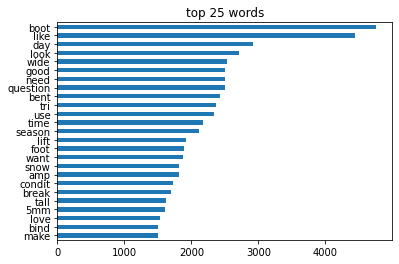

In [23]:
# plot top 25 words
comment_df.sum().sort_values(ascending = False).head(25).plot(
    kind = 'barh', 
    title = 'top 25 words'
)

plt.gca().invert_yaxis();

### Ski Top Words

In [24]:
# CountVectorize ski data
ski_comment_df = cvec_df(ski_10000,'stemmed comments',stopwords)

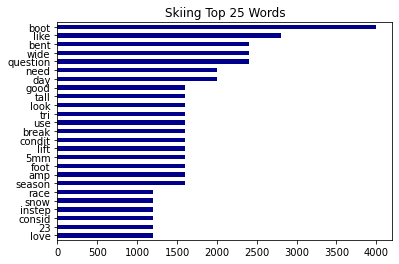

In [25]:
# plot top 25 words of ski comments
ski_comment_df.sum().sort_values(ascending = False).head(25).plot(
    kind = 'barh', 
    color = 'darkblue',
    title = 'Skiing Top 25 Words')

plt.gca().invert_yaxis();

## Snowboarding Top Words

In [26]:
# CountVectorize snowboarding comments
sb_comment_df = cvec_df(sb_10000,'stemmed comments',stopwords)

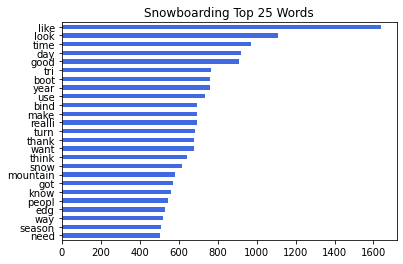

In [27]:
# plot snowboarding top 25 words
sb_comment_df.sum().sort_values(ascending = False).head(25).plot(
    kind = 'barh', 
    color = 'royalblue',
    title = 'Snowboarding Top 25 Words')

plt.gca().invert_yaxis();

## Test Results

In [28]:
# import top model test scores
best_tests_1000_comments = pd.read_csv('./data/best_tests_1000_comments.csv',index_col = 0)
best_tests_2500_comments = pd.read_csv('./data/best_tests_2500_comments.csv',index_col = 0)
best_tests_5000_comments = pd.read_csv('./data/best_tests_5000_comments.csv',index_col = 0)
best_tests_10000_comments = pd.read_csv('./data/best_tests_10000_comments.csv',index_col = 0)

In [29]:
best_tests_1000_comments

,nb cvec,nb tvec,rf cvec,rf tvec,et cvec,et tvec,knn cvec,knn tvec,logr cvec,logr tvec
split0_test_score,0.8550,0.8875,0.8050,0.7725,0.7800,0.7625,0.9950,0.9925,0.9875,0.9900
split1_test_score,0.8675,0.9125,0.7600,0.8050,0.7500,0.8225,0.9975,1.0000,0.9925,1.0000
split2_test_score,0.8525,0.8975,0.7825,0.8375,0.8025,0.8250,1.0000,1.0000,0.9925,0.9975
split3_test_score,0.8825,0.9225,0.7800,0.8100,0.7275,0.7300,1.0000,1.0000,0.9975,1.0000
split4_test_score,0.8600,0.9050,0.7975,0.7875,0.7200,0.8300,1.0000,0.9950,0.9925,0.9950


In [30]:
best_tests_2500_comments

,nb cvec,nb tvec,rf cvec,rf tvec,et cvec,et tvec,knn cvec,knn tvec,logr cvec,logr tvec
split0_test_score,0.869,0.910,0.739,0.805,0.783,0.904,0.991,0.996,0.994,0.996
split1_test_score,0.873,0.912,0.764,0.804,0.733,0.820,0.995,0.999,0.998,0.998
split2_test_score,0.880,0.926,0.777,0.759,0.726,0.838,0.995,1.000,0.998,1.000
split3_test_score,0.893,0.934,0.838,0.825,0.752,0.797,0.987,0.993,0.989,0.994
split4_test_score,0.880,0.926,0.867,0.826,0.753,0.886,0.998,0.997,0.999,0.999


In [31]:
best_tests_5000_comments

,nb cvec,nb tvec,rf cvec,rf tvec,et cvec,et tvec,knn cvec,knn tvec,logr cvec,logr tvec
split0_test_score,0.8755,0.9140,0.8405,0.8040,0.8430,0.8610,0.9935,0.9980,0.9965,0.9990
split1_test_score,0.8875,0.9315,0.7995,0.7795,0.7770,0.8630,0.9920,0.9985,0.9950,0.9985
split2_test_score,0.8855,0.9260,0.8030,0.8025,0.7390,0.8620,0.9960,0.9975,0.9975,0.9980
split3_test_score,0.8740,0.9175,0.7705,0.8250,0.7475,0.9030,0.9935,0.9965,0.9965,0.9980
split4_test_score,0.8765,0.9145,0.7740,0.8225,0.7065,0.8645,0.9900,0.9945,0.9920,0.9960


In [32]:
best_tests_10000_comments

,nb cvec,nb tvec,rf cvec,rf tvec,et cvec,et tvec,knn cvec,knn tvec,logr cvec,logr tvec
split0_test_score,0.950777,0.991577,0.767307,0.795736,0.725981,0.753093,0.993946,0.998947,0.996841,0.998684
split1_test_score,0.951040,0.990261,0.789418,0.788365,0.704922,0.779416,0.995525,0.997894,0.998157,0.998421
split2_test_score,0.952080,0.989205,0.767773,0.738020,0.745919,0.833333,0.989995,0.996051,0.993944,0.997367
split3_test_score,0.950764,0.992364,0.789363,0.822801,0.747235,0.824381,0.994997,0.997894,0.997630,0.998420
split4_test_score,0.951553,0.989205,0.767773,0.785940,0.726172,0.779094,0.991838,0.995261,0.994207,0.996314


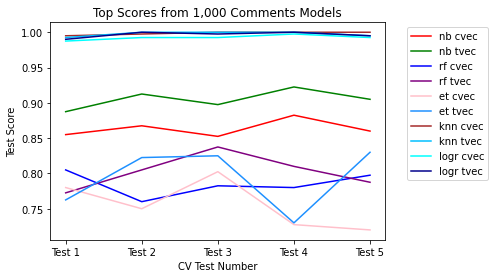

In [33]:
# plot top 1000 comments model scores
ax1 = best_tests_1000_comments.plot(
    y = 'nb cvec', 
    color = 'r', 
    label = 'nb cvec'
)    
ax2 = best_tests_1000_comments.plot(
    y = 'nb tvec', 
    color = 'g', 
    ax=ax1,
    label = 'nb tvec'
)    
ax3 = best_tests_1000_comments.plot(
    y = 'rf cvec', 
    color = 'b', 
    ax = ax1,
    label = 'rf cvec'
)
ax4 = best_tests_1000_comments.plot(
    y = 'rf tvec', 
    color = 'purple', 
    ax=ax1,
    label = 'rf tvec'
)    
ax5 = best_tests_1000_comments.plot(
    y = 'et cvec', 
    color = 'pink', 
    ax=ax1,
    label = 'et cvec'
)    
ax6 = best_tests_1000_comments.plot(
    y = 'et tvec', 
    color = 'dodgerblue', 
    ax = ax1,
    label = 'et tvec'
)
ax7 = best_tests_1000_comments.plot(
    y = 'knn cvec', 
    color = 'brown', 
    ax=ax1,
    label = 'knn cvec'
)    
ax8 = best_tests_1000_comments.plot(
    y = 'knn tvec', 
    color = 'deepskyblue', 
    ax=ax1,
    label = 'knn tvec'
)    
ax9 = best_tests_1000_comments.plot(
    y = 'logr cvec', 
    color = 'cyan', 
    ax = ax1,
    label = 'logr cvec'
)
ax10 = best_tests_1000_comments.plot(
    y = 'logr tvec', 
    color = 'darkblue', 
    ax = ax1,
    label = 'logr tvec'
)

plt.legend(bbox_to_anchor = (1.05, 1))
positions = (0,1,2,3,4)
labels = ('Test 1','Test 2','Test 3','Test 4','Test 5')
plt.xticks(positions,labels)
plt.xlabel('CV Test Number')
plt.ylabel('Test Score')
plt.title('Top Scores from 1,000 Comments Models');

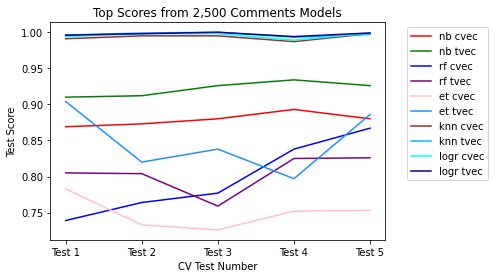

In [34]:
# plot top 2500 comments model scores
ax1 = best_tests_2500_comments.plot(
    y = 'nb cvec', 
    color = 'r', 
    label = 'nb cvec'
)    
ax2 = best_tests_2500_comments.plot(
    y = 'nb tvec', 
    color = 'g', 
    ax=ax1,
    label = 'nb tvec'
)    
ax3 = best_tests_2500_comments.plot(
    y = 'rf cvec', 
    color = 'b', 
    ax = ax1,
    label = 'rf cvec'
)
ax4 = best_tests_2500_comments.plot(
    y = 'rf tvec', 
    color = 'purple', 
    ax=ax1,
    label = 'rf tvec'
)    
ax5 = best_tests_2500_comments.plot(
    y = 'et cvec', 
    color = 'pink', 
    ax=ax1,
    label = 'et cvec'
)    
ax6 = best_tests_2500_comments.plot(
    y = 'et tvec', 
    color = 'dodgerblue', 
    ax = ax1,
    label = 'et tvec'
)
ax7 = best_tests_2500_comments.plot(
    y = 'knn cvec', 
    color = 'brown', 
    ax=ax1,
    label = 'knn cvec'
)    
ax8 = best_tests_2500_comments.plot(
    y = 'knn tvec', 
    color = 'deepskyblue', 
    ax=ax1,
    label = 'knn tvec'
)    
ax9 = best_tests_2500_comments.plot(
    y = 'logr cvec', 
    color = 'cyan', 
    ax = ax1,
    label = 'logr cvec'
)
ax10 = best_tests_2500_comments.plot(
    y = 'logr tvec', 
    color = 'darkblue', 
    ax = ax1,
    label = 'logr tvec'
)

plt.legend(bbox_to_anchor = (1.05, 1))
positions = (0,1,2,3,4)
labels = ('Test 1','Test 2','Test 3','Test 4','Test 5')
plt.xticks(positions,labels)
plt.xlabel('CV Test Number')
plt.ylabel('Test Score')
plt.title('Top Scores from 2,500 Comments Models');

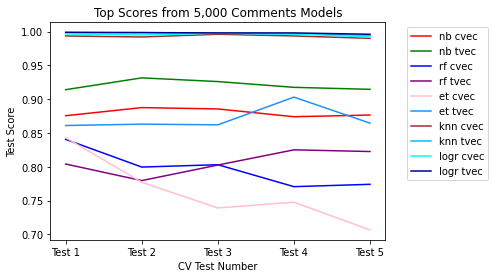

In [35]:
# plot top 5000 comments model scores
ax1 = best_tests_5000_comments.plot(
    y = 'nb cvec', 
    color = 'r', 
    label = 'nb cvec'
)    
ax2 = best_tests_5000_comments.plot(
    y = 'nb tvec', 
    color = 'g', 
    ax=ax1,
    label = 'nb tvec'
)    
ax3 = best_tests_5000_comments.plot(
    y = 'rf cvec', 
    color = 'b', 
    ax = ax1,
    label = 'rf cvec'
)
ax4 = best_tests_5000_comments.plot(
    y = 'rf tvec', 
    color = 'purple', 
    ax=ax1,
    label = 'rf tvec'
)    
ax5 = best_tests_5000_comments.plot(
    y = 'et cvec', 
    color = 'pink', 
    ax=ax1,
    label = 'et cvec'
)    
ax6 = best_tests_5000_comments.plot(
    y = 'et tvec', 
    color = 'dodgerblue', 
    ax = ax1,
    label = 'et tvec'
)
ax7 = best_tests_5000_comments.plot(
    y = 'knn cvec', 
    color = 'brown', 
    ax=ax1,
    label = 'knn cvec'
)    
ax8 = best_tests_5000_comments.plot(
    y = 'knn tvec', 
    color = 'deepskyblue', 
    ax=ax1,
    label = 'knn tvec'
)    
ax9 = best_tests_5000_comments.plot(
    y = 'logr cvec', 
    color = 'cyan', 
    ax = ax1,
    label = 'logr cvec'
)
ax10 = best_tests_5000_comments.plot(
    y = 'logr tvec', 
    color = 'darkblue', 
    ax = ax1,
    label = 'logr tvec'
)

plt.legend(bbox_to_anchor = (1.05, 1))
positions = (0,1,2,3,4)
labels = ('Test 1','Test 2','Test 3','Test 4','Test 5')
plt.xticks(positions,labels)
plt.xlabel('CV Test Number')
plt.ylabel('Test Score')
plt.title('Top Scores from 5,000 Comments Models');

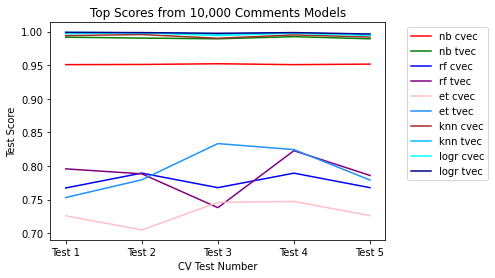

In [36]:
# plot top 10000 comments model scores
ax1 = best_tests_10000_comments.plot(
    y = 'nb cvec', 
    color = 'r', 
    label = 'nb cvec'
)    
ax2 = best_tests_10000_comments.plot(
    y = 'nb tvec', 
    color = 'g', 
    ax=ax1,
    label = 'nb tvec'
)    
ax3 = best_tests_10000_comments.plot(
    y = 'rf cvec', 
    color = 'b', 
    ax = ax1,
    label = 'rf cvec'
)
ax4 = best_tests_10000_comments.plot(
    y = 'rf tvec', 
    color = 'purple', 
    ax=ax1,
    label = 'rf tvec'
)    
ax5 = best_tests_10000_comments.plot(
    y = 'et cvec', 
    color = 'pink', 
    ax=ax1,
    label = 'et cvec'
)    
ax6 = best_tests_10000_comments.plot(
    y = 'et tvec', 
    color = 'dodgerblue', 
    ax = ax1,
    label = 'et tvec'
)
ax7 = best_tests_10000_comments.plot(
    y = 'knn cvec', 
    color = 'brown', 
    ax=ax1,
    label = 'knn cvec'
)    
ax8 = best_tests_10000_comments.plot(
    y = 'knn tvec', 
    color = 'deepskyblue', 
    ax=ax1,
    label = 'knn tvec'
)    
ax9 = best_tests_10000_comments.plot(
    y = 'logr cvec', 
    color = 'cyan', 
    ax = ax1,
    label = 'logr cvec'
)
ax10 = best_tests_10000_comments.plot(
    y = 'logr tvec', 
    color = 'darkblue', 
    ax = ax1,
    label = 'logr tvec'
)

plt.legend(bbox_to_anchor = (1.05, 1))
positions = (0,1,2,3,4)
labels = ('Test 1','Test 2','Test 3','Test 4','Test 5')
plt.xticks(positions,labels)
plt.xlabel('CV Test Number')
plt.ylabel('Test Score')
plt.title('Top Scores from 10,000 Comments Models');

## Top Scores

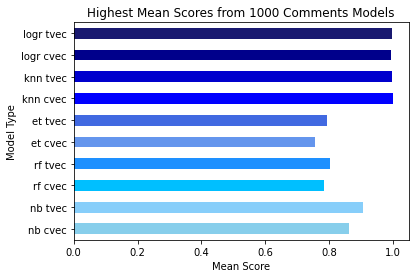

In [37]:
# plot top 1000 comments model scores
best_tests_1000_comments.mean().plot(
    kind = 'barh',
    color = ['skyblue','lightskyblue','deepskyblue',
             'dodgerblue','cornflowerblue','royalblue',
             'b','mediumblue','darkblue','midnightblue']
)

plt.xlabel('Mean Score')
plt.ylabel('Model Type')
plt.title('Highest Mean Scores from 1000 Comments Models');

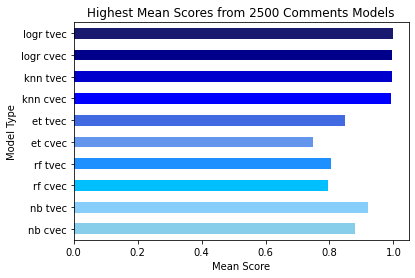

In [38]:
# plot top 2500 comments model scores
best_tests_2500_comments.mean().plot(
    kind = 'barh',
    color = ['skyblue','lightskyblue','deepskyblue',
             'dodgerblue','cornflowerblue','royalblue',
             'b','mediumblue','darkblue','midnightblue']
)

plt.xlabel('Mean Score')
plt.ylabel('Model Type')
plt.title('Highest Mean Scores from 2500 Comments Models');

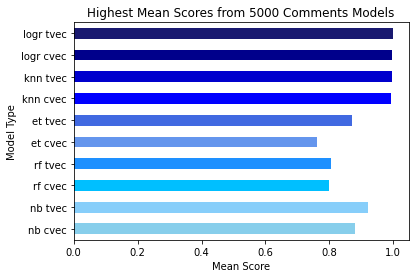

In [39]:
# plot top 5000 comments model scores
best_tests_5000_comments.mean().plot(
    kind = 'barh',
    color = ['skyblue','lightskyblue','deepskyblue',
             'dodgerblue','cornflowerblue','royalblue',
             'b','mediumblue','darkblue','midnightblue']
)

plt.xlabel('Mean Score')
plt.ylabel('Model Type')
plt.title('Highest Mean Scores from 5000 Comments Models');

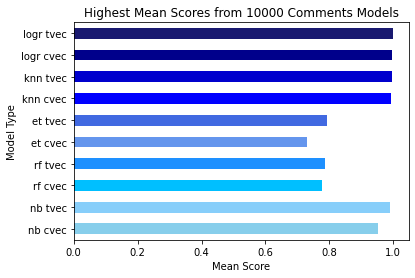

In [40]:
# plot top 10000 comments model scores
best_tests_10000_comments.mean().plot(
    kind = 'barh',
    color = ['skyblue','lightskyblue','deepskyblue',
             'dodgerblue','cornflowerblue','royalblue',
             'b','mediumblue','darkblue','midnightblue']
)

plt.xlabel('Mean Score')
plt.ylabel('Model Type')
plt.title('Highest Mean Scores from 10000 Comments Models');

In [41]:
# take the top mean scores from the models
tests_1000 = pd.DataFrame(best_tests_1000_comments.mean())
tests_2500 = pd.DataFrame(best_tests_2500_comments.mean())
tests_5000 = pd.DataFrame(best_tests_5000_comments.mean())
tests_10000 = pd.DataFrame(best_tests_10000_comments.mean())

In [42]:
tests_1000.columns = ['1000 comments']
tests_2500.columns = ['2500 comments']
tests_5000.columns = ['5000 comments']
tests_10000.columns = ['10000 comments']

In [43]:
# concatenate top tests dataframes 
tests = pd.concat([tests_1000,tests_2500,tests_5000,tests_10000],axis = 1)

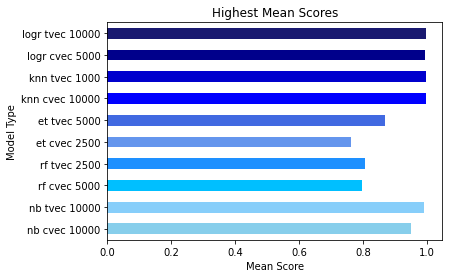

In [44]:
# plot the highest mean scores of all models
tests.max(axis = 1).plot(
    kind = 'barh',
    color = ['skyblue','lightskyblue','deepskyblue',
             'dodgerblue','cornflowerblue','royalblue',
             'b','mediumblue','darkblue','midnightblue']
)
positions = (0,1,2,3,4,5,6,7,8,9)
labels = ('nb cvec 10000','nb tvec 10000','rf cvec 5000',
          'rf tvec 2500','et cvec 2500','et tvec 5000',
          'knn cvec 10000','knn tvec 1000','logr cvec 5000',
          'logr tvec 10000')
plt.yticks(positions,labels)
plt.xlabel('Mean Score')
plt.ylabel('Model Type')
plt.title('Highest Mean Scores');

## 5000 comments

In [45]:
# create a dataframe with 5000 snowboarding comments
sb_5000 = sb_10000.head(5000)

In [46]:
sb_5000.to_csv('./data/sb_comment_data_5000.csv')

In [47]:
# create a dataframe with 5000 skiing comments
ski_5000 = ski_10000.head(5000)

In [48]:
ski_5000.to_csv('./data/ski_comment_data_5000.csv')

In [49]:
# create a dataframe with 5000 snowboarding and 5000 skiing comments
sb_v_ski_5000 = pd.concat([sb_5000,ski_5000]).reset_index(drop = True)

In [50]:
sb_v_ski_5000.to_csv('./data/all_comment_data_5000.csv')

## 2500 comments

In [51]:
# create a dataframe with 2500 snowboarding comments
sb_2500 = sb_10000.head(2500)

In [52]:
sb_2500.to_csv('./data/sb_comment_data_2500.csv')

In [53]:
# create a dataframe with 2500 skiing comments
ski_2500 = ski_10000.head(2500)

In [54]:
ski_2500.to_csv('./data/ski_comment_data_2500.csv')

In [55]:
# create a dataframe with 2500 snowboarding and 2500 skiing comments
sb_v_ski_2500 = pd.concat([sb_2500,ski_2500]).reset_index(drop = True)

In [56]:
sb_v_ski_2500.to_csv('./data/all_comment_data_2500.csv')

## 1000 comments

In [57]:
# create a dataframe with 1000 snowboarding comments
sb_1000 = sb_10000.head(1000)

In [58]:
sb_1000.to_csv('./data/sb_comment_data_1000.csv')

In [59]:
# create a dataframe with 1000 skiing comments
ski_1000 = ski_10000.head(1000)

In [60]:
ski_1000.to_csv('./data/ski_comment_data_1000.csv')

In [61]:
# create a dataframe with 1000 snowboarding and 1000 skiing comments
sb_v_ski_1000 = pd.concat([sb_1000,ski_1000]).reset_index(drop = True)

In [62]:
sb_v_ski_1000.to_csv('./data/all_comment_data_1000.csv')